In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#  <font color= red> 1. 관광소비유형 그래프 만들기 </font>

In [6]:
cun_type = pd.read_csv('./dataset/관광소비_유형.csv', encoding='cp949')

In [7]:
df = pd.DataFrame(cun_type)
df.columns = ['대분류', '중분류', '소비액(천원)']
df.head()

,대분류,중분류,소비액(천원)
0,쇼핑업,관광기념품,"658,439"
1,쇼핑업,레저용품쇼핑,"17,557,618"
2,쇼핑업,대형쇼핑몰,"40,675,488"
3,숙박업,호텔,"1,920,292"
4,숙박업,콘도,"3,785,115"


저는 데이터의 대분류만 필요하기 때문에 이 데이터프레임에 중분류는 제거했습니다.

In [8]:
df.drop(columns='중분류',  axis=1, inplace=True)
df

,대분류,소비액(천원)
0,쇼핑업,"658,439"
1,쇼핑업,"17,557,618"
2,쇼핑업,"40,675,488"
3,숙박업,"1,920,292"
4,숙박업,"3,785,115"
5,숙박업,"403,996"
6,숙박업,"19,860,605"
7,식음료업,"209,613,066"
8,여가서비스업,"1,093,700"
9,여가서비스업,"7,953,039"


In [9]:
df.dtypes

대분류        object
소비액(천원)    object
dtype: object

대분류를 기준으로 통합을 하려고 봤더니 소비액이 문자열임을 알게 되었습니다. 이를 int로 바꾸겠습니다. <br><br>
`df['소비액(천원)'].astype(int)`로 바꾸려고 했는데 소비액컬럼의 ','이 문제가 되었습니다. 이를 먼저 제거후 int로 바꿔야 합니다.

In [10]:
df['소비액(천원)'] = df['소비액(천원)'].str.replace(',', '')

In [11]:
df['소비액(천원)'] = df['소비액(천원)'].astype('int')

In [12]:
print(df.head())
print(df.dtypes)

   대분류   소비액(천원)
0  쇼핑업    658439
1  쇼핑업  17557618
2  쇼핑업  40675488
3  숙박업   1920292
4  숙박업   3785115
대분류        object
소비액(천원)     int32
dtype: object


이제 `df.groupby('대분류')`로 합칠 컬럼의 기준을 세웁니다. 그후 sum을 통해 합칩니다.

In [13]:
group = df.groupby('대분류')
cleaned_df = group.sum()

In [14]:
cleaned_df

,소비액(천원)
대분류,
쇼핑업,58891545
숙박업,25970008
식음료업,209613066
여가서비스업,11995982
여행업,6887
운송업,134436


## 새로운 컬럼 rate 추가하기

관광 소비유형 그래프에 쓸 `rate`컬럼을 추가해보도록 하겠습니다. 소비액의 전체 합계를 구해준 다음 퍼센트를 리스트에 담습니다.

In [15]:
cleaned_df.sum()

소비액(천원)    306611924
dtype: int64

In [16]:
합계= []  
for a in cleaned_df['소비액(천원)'] :
    rate = a / 306611924 * 100
    합계.append(rate)
print(합계)

[19.20719332494062, 8.469992836938722, 68.36429035943168, 3.912431663942724, 0.002246161828983533, 0.0438456529172688]


In [17]:
cleaned_df['rate'] = 합계
cleaned_df

,소비액(천원),rate
대분류,,
쇼핑업,58891545,19.207193
숙박업,25970008,8.469993
식음료업,209613066,68.364290
여가서비스업,11995982,3.912432
여행업,6887,0.002246
운송업,134436,0.043846


## 그래프 그리기

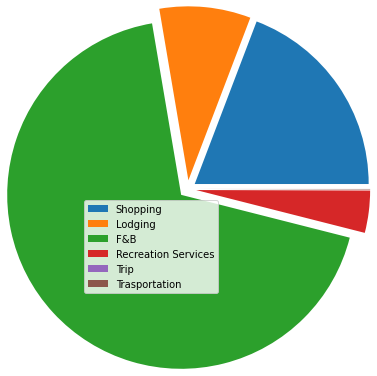

In [18]:
data = cleaned_df['rate']
labels = ['Shopping', 'Lodging', 'F&B', 'Recreation Services', 'Trip', 'Trasportation']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(data, radius=2, explode=explode)
plt.legend(labels, loc='lower left')

# <font color= red> 2. 사람들이 강릉에 놀러오면 가장 많이 먹는 음식은 무엇일까? </font>

이제 본격적으로 강릉에 놀러온 사람들이 주로 찾는 음식을 분류별로 나눠보겠습니다.

In [19]:
지역맛집_외지인 = pd.read_csv('./dataset/지역_맛집_외지인.csv', encoding='euc-kr')
지역맛집_외지인 = pd.DataFrame(지역맛집_외지인)

In [20]:
지역맛집_외지인.head() 

,순위,업소명,주소,분류,외지인 검색 수
0,1,동화가든,강원 강릉시 초당순두부길77번길 15-0,한식,141365
1,2,강릉커피거리,강원 강릉시,먹거리기타,111199
2,3,카페툇마루,강원 강릉시 난설헌로 232-0,카페기타,89966
3,4,테라로사커피공장강릉본점,강원 강릉시 현천길 7-0,커피전문점,83281
4,5,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,음식점기타,62087


## 2.1 데이터 전처리

### 2.1.1 분류 처리하기

In [21]:
지역맛집_외지인['분류'].unique() #분류 나열하기

array(['한식', '먹거리기타', '카페기타', '커피전문점', '음식점기타', '전문음식점', '제과점', '중식',
       '패스트푸드'], dtype=object)

분류별로 나눠야하기 때문에 전체 분류의 종류들을 파악해보았습니다. 하지만 이 분류들에는 비슷해보이는 데이터가 눈에 띕니다. 이들을 하나의 분류로 바꾸겠습니다.

In [22]:
지역맛집_외지인['분류'] = 지역맛집_외지인['분류'].replace(['카페기타', '커피전문점'], '카페')

카페는 특별히 구분해야될 필요성을 느끼지 못했습니다. 그래서 전부 '카페'로 구분하였습니다.

In [23]:
print(지역맛집_외지인[지역맛집_외지인['분류'] == '먹거리기타'])
지역맛집_외지인.drop(index=[1, 6], level=None, inplace=True)

   순위     업소명      주소     분류  외지인 검색 수
1   2  강릉커피거리  강원 강릉시  먹거리기타    111199
6   7  초당두부마을  강원 강릉시  먹거리기타     31360


먹거리기타는 사실상 가게라고 볼 수 없습니다. 음식점이 모여있는 거리죠. 그냥 drop하는 것이 적절해보입니다.

In [24]:
지역맛집_외지인[지역맛집_외지인['분류'] == '음식점기타']

,순위,업소명,주소,분류,외지인 검색 수
4,5,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,음식점기타,62087
29,30,만석닭강정안목직영점,강원 강릉시 창해로2번길 32-0,음식점기타,12282
31,32,동해기정떡,강원 강릉시 교동광장로 29-0,음식점기타,10881
61,62,버드나무브루어리,강원 강릉시 경강로 1961-0,음식점기타,7635
96,97,썸머키친,강원 강릉시 죽헌길 67-6,음식점기타,4988


In [25]:
지역맛집_외지인.loc[31, '분류'] = '제과점'

음식점기타에는 총 다섯 개의 데이터 밖에 없군요. 동해기정떡은 제과점으로 보내겠습니다.

In [26]:
지역맛집_외지인[지역맛집_외지인['분류'] == '전문음식점']

,순위,업소명,주소,분류,외지인 검색 수
9,10,장안횟집,강원 강릉시 진리항구길 51-0,전문음식점,23942
56,57,제주해인물회,강원 강릉시 진리해변길 68-9,전문음식점,8045
66,67,강문가,강원 강릉시 초당원길 17-0,전문음식점,6819
67,68,독도네본점,강원 강릉시 옥천로 47-0,전문음식점,6795
69,70,풍호맛뜨락본점,강원 강릉시 임영로 10-0,전문음식점,6644
70,71,최대게본점,강원 강릉시 해안로 1729-0,전문음식점,6573
73,74,염전횟집,강원 강릉시 염전길 147-0,전문음식점,6398
84,85,주문진활어회센터,강원 강릉시 해안로 1757-0,전문음식점,5355
87,88,강릉전복해물뚝배기,강원 강릉시 창해로350번길 5-0,전문음식점,5299
94,95,강릉해파랑,강원 강릉시 창해로350번길 17-0,전문음식점,5102


전문음식점은 전부 횟집인 것을 확인할 수 있습니다.

In [27]:
지역맛집_외지인.drop('순위', axis = 1, inplace=True)

### 2.1.2 주소값이 명확하지 않은 데이터 처리하기

In [28]:
print(len(지역맛집_외지인))
지역맛집_외지인.head()

98


,업소명,주소,분류,외지인 검색 수
0,동화가든,강원 강릉시 초당순두부길77번길 15-0,한식,141365
2,카페툇마루,강원 강릉시 난설헌로 232-0,카페,89966
3,테라로사커피공장강릉본점,강원 강릉시 현천길 7-0,카페,83281
4,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,음식점기타,62087
5,곳,강원 강릉시 진리해변길 143-0,카페,42426


csv파일을 둘러봤을때 주소가 명확하지 않은 업소를 발견했습니다. 검색해보니 가자미 회무침, 매운탕, 대게 칼국수로 유명한 맛집입니다. 전문음식점으로 분류하고 정확한 주소를 입력하겠습니다.

In [29]:
#데이터 골라내기
drop_data = 지역맛집_외지인[지역맛집_외지인['주소']=='강원 강릉시']
drop_data

,업소명,주소,분류,외지인 검색 수
97,항구마차,강원 강릉시,한식,4980


In [30]:
지역맛집_외지인.loc[97, '분류'] = '전문음식점'
지역맛집_외지인.loc[97, '주소'] = '강원 강릉시 옥계면 금진리 149-3'
지역맛집_외지인.loc[97, :]

업소명                         항구마차
주소          강원 강릉시 옥계면 금진리 149-3
분류                         전문음식점
외지인 검색 수                    4980
Name: 97, dtype: object

In [31]:
지역맛집_외지인 = 지역맛집_외지인.reset_index(drop=True)
print(len(지역맛집_외지인))
지역맛집_외지인.head()

98


,업소명,주소,분류,외지인 검색 수
0,동화가든,강원 강릉시 초당순두부길77번길 15-0,한식,141365
1,카페툇마루,강원 강릉시 난설헌로 232-0,카페,89966
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7-0,카페,83281
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,음식점기타,62087
4,곳,강원 강릉시 진리해변길 143-0,카페,42426


### 2.1.3 중복값 확인 및 처리하기

이 포트폴리오의 주된 목적은 

In [32]:
지역맛집_외지인[지역맛집_외지인['주소'].duplicated() == True]

,업소명,주소,분류,외지인 검색 수
18,초당소나무집,강원 강릉시 초당순두부길 95-5,한식,17031
39,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,한식,9540
70,차현희순두부청국장본점,강원 강릉시 초당순두부길 98-0,한식,6401
83,복사꽃싸롱,강원 강릉시 학교담길 32-8,카페,5331


In [33]:
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 초당순두부길 95-5'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 경강로2255번길 21-0'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 초당순두부길 98-0'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 학교담길 32-8'])


          업소명                  주소  분류  외지인 검색 수
14  순두부젤라또1호점  강원 강릉시 초당순두부길 95-5  카페     19343
18     초당소나무집  강원 강릉시 초당순두부길 95-5  한식     17031
          업소명                     주소     분류  외지인 검색 수
3   엄지네포장마차본점  강원 강릉시 경강로2255번길 21-0  음식점기타     62087
39  엄지네포장마차본점  강원 강릉시 경강로2255번길 21-0     한식      9540
            업소명                  주소  분류  외지인 검색 수
22    차현희순두부청국장  강원 강릉시 초당순두부길 98-0  한식     15542
70  차현희순두부청국장본점  강원 강릉시 초당순두부길 98-0  한식      6401
      업소명                주소  분류  외지인 검색 수
26  도깨비시장  강원 강릉시 학교담길 32-8  카페     12365
83  복사꽃싸롱  강원 강릉시 학교담길 32-8  카페      5331


중복되어 있는 데이터들을 모았습니다. 이들의 검색 수를 하나로 합쳐보겠습니다. 그러나 순두부젤라또 1호점과 초당 소나무집은 사실상 다른 가게라고 봐도 될 것 같아서 놔두고 나머지들만 하나로 합쳐보겠습니다.

In [34]:
지역맛집_외지인.iloc[3, 3] = 62087 + 9540

지역맛집_외지인.iloc[22, 3] = 15542 + 6401

지역맛집_외지인.iloc[26, 3] = 12365 + 5331

In [35]:
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 초당순두부길 95-5'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 경강로2255번길 21-0'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 초당순두부길 98-0'])
print(지역맛집_외지인[지역맛집_외지인['주소'] == '강원 강릉시 학교담길 32-8'])

          업소명                  주소  분류  외지인 검색 수
14  순두부젤라또1호점  강원 강릉시 초당순두부길 95-5  카페     19343
18     초당소나무집  강원 강릉시 초당순두부길 95-5  한식     17031
          업소명                     주소     분류  외지인 검색 수
3   엄지네포장마차본점  강원 강릉시 경강로2255번길 21-0  음식점기타     71627
39  엄지네포장마차본점  강원 강릉시 경강로2255번길 21-0     한식      9540
            업소명                  주소  분류  외지인 검색 수
22    차현희순두부청국장  강원 강릉시 초당순두부길 98-0  한식     21943
70  차현희순두부청국장본점  강원 강릉시 초당순두부길 98-0  한식      6401
      업소명                주소  분류  외지인 검색 수
26  도깨비시장  강원 강릉시 학교담길 32-8  카페     17696
83  복사꽃싸롱  강원 강릉시 학교담길 32-8  카페      5331


In [36]:
지역맛집_외지인.drop(index=[39, 70, 83], inplace=True)
지역맛집_외지인.loc[[39, 70, 83], :]

KeyError: "None of [Int64Index([39, 70, 83], dtype='int64')] are in the [index]"

중복된 데이터중 외지인 검색 수가 많은 쪽으로 합치고, 외지인 검색 수가 적은 데이터는 `DROP`메서드로 삭제시켰습니다. Error 메세지가 `"None of [Int64Index([39, 70, 83], dtype='int64')] are in the [index]"`인 거 보면 확실하게 제거되었음을 알 수 있습니다.

In [37]:
지역맛집_외지인

,업소명,주소,분류,외지인 검색 수
0,동화가든,강원 강릉시 초당순두부길77번길 15-0,한식,141365
1,카페툇마루,강원 강릉시 난설헌로 232-0,카페,89966
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7-0,카페,83281
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21-0,음식점기타,71627
4,곳,강원 강릉시 진리해변길 143-0,카페,42426
...,...,...,...,...
93,미르마르본점,강원 강릉시 창해로14번길 22-0,카페,5076
94,썸머키친,강원 강릉시 죽헌길 67-6,음식점기타,4988
95,항구마차,강원 강릉시 옥계면 금진리 149-3,전문음식점,4980
96,오월커피,강원 강릉시 경강로2046번길 11-2,카페,4971


3개가 지워져서 총 95개의 데이터가 되었습니다. `reset_index`를 하여 인덱스를 초기화했습니다.

In [38]:
지역맛집_외지인.reset_index(drop=True, inplace=True)

## 2.2 위도, 경도 데이터 생성하고 합치기!

이번에는 지도에서 위치를 표시하기 위해 필요한 위도, 경도를 표시하는 코드를 작성해보겠습니다.

In [39]:
지역맛집_외지인_주소 = 지역맛집_외지인['주소']

In [40]:
지역맛집_외지인_주소.head()

0    강원 강릉시 초당순두부길77번길 15-0
1         강원 강릉시 난설헌로 232-0
2            강원 강릉시 현천길 7-0
3     강원 강릉시 경강로2255번길 21-0
4        강원 강릉시 진리해변길 143-0
Name: 주소, dtype: object

In [41]:
지역맛집_외지인_주소.info()

<class 'pandas.core.series.Series'>
RangeIndex: 95 entries, 0 to 94
Series name: 주소
Non-Null Count  Dtype 
--------------  ----- 
95 non-null     object
dtypes: object(1)
memory usage: 888.0+ bytes


지역맛집_외지인_주소에서 0이 적혀있을때 혹시 주소를 잘못 받아오지 않을까 싶어서 이를 제거하는 코드를 작성하겠습니다.

In [42]:
지역맛집_외지인_주소[0][:-2] #'강원 강릉시 초당순두부길77번길 15'
지역맛집_외지인_주소[0][-1] == '0' #True
range(len(지역맛집_외지인_주소)) #range(0, 97)

range(0, 95)

In [43]:
#geopy검색을 방해하는 끝글자를 제거하는 코드 작성
C_지역맛집_외지인_주소 = []
for i in 지역맛집_외지인_주소:
    if i[-1] == '0':
        C_지역맛집_외지인_주소.append(i[:-2])
    else :
        C_지역맛집_외지인_주소.append(i)
C_지역맛집_외지인_주소

['강원 강릉시 초당순두부길77번길 15',
 '강원 강릉시 난설헌로 232',
 '강원 강릉시 현천길 7',
 '강원 강릉시 경강로2255번길 21',
 '강원 강릉시 진리해변길 143',
 '강원 강릉시 난설헌로 145',
 '강원 강릉시 창해로350번길 3',
 '강원 강릉시 진리항구길 51',
 '강원 강릉시 난설헌로 144',
 '강원 강릉시 남강초교1길 24',
 '강원 강릉시 해안로 1107',
 '강원 강릉시 순포안길 6',
 '강원 강릉시 임영로182번길 7-1',
 '강원 강릉시 초당순두부길 77',
 '강원 강릉시 초당순두부길 95-5',
 '강원 강릉시 경강로2069번길 15',
 '강원 강릉시 경강로 2642',
 '강원 강릉시 강릉대로587번길 10-5',
 '강원 강릉시 초당순두부길 95-5',
 '강원 강릉시 강릉대로204번길 2',
 '강원 강릉시 강릉대로 205',
 '강원 강릉시 경강로 2400',
 '강원 강릉시 초당순두부길 98',
 '강원 강릉시 솔올로 103',
 '강원 강릉시 창해로 419',
 '강원 강릉시 금성로 6',
 '강원 강릉시 학교담길 32-8',
 '강원 강릉시 창해로2번길 32',
 '강원 강릉시 창해로350번길 33',
 '강원 강릉시 교동광장로 29',
 '강원 강릉시 해안로 1822',
 '강원 강릉시 창해로14번길 28',
 '강원 강릉시 가작로 8',
 '강원 강릉시 창해로14번길 40',
 '강원 강릉시 하슬라로232번길 26-12',
 '강원 강릉시 주문북로 222-',
 '강원 강릉시 범일로 364',
 '강원 강릉시 철둑길 42',
 '강원 강릉시 난설헌로 200',
 '강원 강릉시 초당원길 63-2',
 '강원 강릉시 하슬라로 159',
 '강원 강릉시 초당순두부길 2',
 '강원 강릉시 대학길 12-6',
 '강원 강릉시 하슬라로206번길 4-3',
 '강원 강릉시 교동광장로 114',
 '강원 강릉시 성안길 47-3',
 '강원 강릉시 진고개로 2679',
 '강원 강릉시 경강로 

In [44]:
a지역맛집_외지인_주소 = []
for i in 지역맛집_외지인.iloc[:, 1]:
    if i[-1] == '0':
        a지역맛집_외지인_주소.append(i[:-2])
    else :
        a지역맛집_외지인_주소.append(i)

In [45]:
a지역맛집_외지인_주소[:5]

['강원 강릉시 초당순두부길77번길 15',
 '강원 강릉시 난설헌로 232',
 '강원 강릉시 현천길 7',
 '강원 강릉시 경강로2255번길 21',
 '강원 강릉시 진리해변길 143']

In [46]:
지역맛집_외지인['주소'] = a지역맛집_외지인_주소

In [47]:
print(지역맛집_외지인.head())
print(len(지역맛집_외지인))

            업소명                    주소     분류  외지인 검색 수
0          동화가든  강원 강릉시 초당순두부길77번길 15     한식    141365
1         카페툇마루       강원 강릉시 난설헌로 232     카페     89966
2  테라로사커피공장강릉본점          강원 강릉시 현천길 7     카페     83281
3     엄지네포장마차본점   강원 강릉시 경강로2255번길 21  음식점기타     71627
4             곳      강원 강릉시 진리해변길 143     카페     42426
95


먼저 위경도를 뽑아내는 함수를 작성해줍니다. 그리고 나서 반복문을 통해 위에서 작성한 `C_지역맛집_외지인_주소`를 사용합니다.

In [48]:
import requests

In [49]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers = {'Authorization': "KakaoAK 61897774dcd5bf2ced1d1e663493fb33"}
    
    places = requests.get(url, headers=headers).json()['documents']
    
    place = places[0]
    
    
    name = place['place_name']
    x=place['x']
    y=place['y']
    
    data = [name, x, y, searching]
    
    return data

find_places('카페툇마루')

['카페툇마루', '128.914525727344', '37.7928533236502', '카페툇마루']

코드가 처리하는데 시간이 좀 걸려 tqdm으로 진행상황을 같이 표시해줍니다.

In [50]:
import time
location_inform = []

for location in tqdm(C_지역맛집_외지인_주소):
    try:
        data = find_places(location)
        location_inform.append(data)
        time.sleep(0.5)
    except:
        pass
location_inform

  0%|          | 0/95 [00:00<?, ?it/s]

[['동화가든 본점', '128.9146602222657', '37.79115936919092', '강원 강릉시 초당순두부길77번길 15'],
 ['카페툇마루', '128.914525727344', '37.7928533236502', '강원 강릉시 난설헌로 232'],
 ['테라로사 커피공장', '128.892635518675', '37.696377174949', '강원 강릉시 현천길 7'],
 ['엄지네포장마차 본점', '128.907013317207', '37.7663212182933', '강원 강릉시 경강로2255번길 21'],
 ['카페 곳', '128.872627309735', '37.8433720577454', '강원 강릉시 진리해변길 143'],
 ['테라로사 경포호수점', '128.907503359582', '37.7878613282065', '강원 강릉시 난설헌로 145'],
 ['스타벅스 강릉강문해변점', '128.91855490234', '37.7947119397031', '강원 강릉시 창해로350번길 3'],
 ['장안회집', '128.875380156945', '37.8376025391946', '강원 강릉시 진리항구길 51'],
 ['갤러리밥스', '128.90804242454263', '37.787194986056114', '강원 강릉시 난설헌로 144'],
 ['강릉빵다방 본점', '128.91811727610298', '37.7690056080449', '강원 강릉시 남강초교1길 24'],
 ['테라로사 사천점', '128.88502794149113', '37.82237030696167', '강원 강릉시 순포안길 6'],
 ['현대장칼국수', '128.89266667294712', '37.75747840693388', '강원 강릉시 임영로182번길 7-1'],
 ['초당할머니순두부', '128.915396082152', '37.7905546548915', '강원 강릉시 초당순두부길 77'],
 ['순두부젤라또 1호점', '128.

In [51]:
len(location_inform) #95개의 데이터중 83개의 데이터에서만 위경도가 추출됐음을 알 수 있습니다.

83

In [52]:
columns = ['업소명', '경도', '위도', '주소']
location_inform_df = pd.DataFrame(location_inform, columns=columns)

In [53]:
location_inform_df = location_inform_df[['업소명', '주소', '위도', '경도']]

In [54]:
location_inform_df

,업소명,주소,위도,경도
0,동화가든 본점,강원 강릉시 초당순두부길77번길 15,37.79115936919092,128.9146602222657
1,카페툇마루,강원 강릉시 난설헌로 232,37.7928533236502,128.914525727344
2,테라로사 커피공장,강원 강릉시 현천길 7,37.696377174949,128.892635518675
3,엄지네포장마차 본점,강원 강릉시 경강로2255번길 21,37.7663212182933,128.907013317207
4,카페 곳,강원 강릉시 진리해변길 143,37.8433720577454,128.872627309735
...,...,...,...,...
78,미르마르,강원 강릉시 창해로14번길 22,37.77250195059535,128.94726032835422
79,썸머키친,강원 강릉시 죽헌길 67-6,37.7749306729161,128.875075563661
80,항구마차,강원 강릉시 옥계면 금진리 149-3,37.6492228568593,129.047295558679
81,오월,강원 강릉시 경강로2046번길 11-2,37.750794496477184,128.89314985333675


In [55]:
지역맛집_외지인.head()

,업소명,주소,분류,외지인 검색 수
0,동화가든,강원 강릉시 초당순두부길77번길 15,한식,141365
1,카페툇마루,강원 강릉시 난설헌로 232,카페,89966
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7,카페,83281
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21,음식점기타,71627
4,곳,강원 강릉시 진리해변길 143,카페,42426


이제 이 두 데이터를 merge를 통해 합쳐보겠습니다. `key`는 주소를 쓰며, 합치기 전에 `location_inform_df`의 업소명을 미리 지우겠습니다.

In [56]:
location_inform_df = location_inform_df[['주소', '위도', '경도']]

In [57]:
지역맛집_외지인_완 = pd.merge(지역맛집_외지인, location_inform_df, how='left')

In [58]:
지역맛집_외지인_완

,업소명,주소,분류,외지인 검색 수,위도,경도
0,동화가든,강원 강릉시 초당순두부길77번길 15,한식,141365,37.79115936919092,128.9146602222657
1,카페툇마루,강원 강릉시 난설헌로 232,카페,89966,37.7928533236502,128.914525727344
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7,카페,83281,37.696377174949,128.892635518675
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21,음식점기타,71627,37.7663212182933,128.907013317207
4,곳,강원 강릉시 진리해변길 143,카페,42426,37.8433720577454,128.872627309735
...,...,...,...,...,...,...
92,미르마르본점,강원 강릉시 창해로14번길 22,카페,5076,37.77250195059535,128.94726032835422
93,썸머키친,강원 강릉시 죽헌길 67-6,음식점기타,4988,37.7749306729161,128.875075563661
94,항구마차,강원 강릉시 옥계면 금진리 149-3,전문음식점,4980,37.6492228568593,129.047295558679
95,오월커피,강원 강릉시 경강로2046번길 11-2,카페,4971,37.750794496477184,128.89314985333675


In [59]:
지역맛집_외지인_완.to_csv('./지역맛집_완.csv', encoding='utf-8-sig', index=False )

데이터를 저장하고 살펴보았을 때, 주소가 중복되서 저장된 데이터가 총 2개가 나타났고, 위경도가 반환되지 않은 업소가 발견되었습니다.

In [60]:
지역맛집_완 = pd.read_csv('./지역맛집_완.csv')

In [61]:
print(len(지역맛집_완))

97


In [62]:
지역맛집_완.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업소명       97 non-null     object 
 1   주소        97 non-null     object 
 2   분류        97 non-null     object 
 3   외지인 검색 수  97 non-null     int64  
 4   위도        85 non-null     float64
 5   경도        85 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


위에도 보다시피 위도, 경도의 데이터 갯수가 12개 적은 걸로 보입니다. 데이터가 입력되지 않았다는 뜻입니다.

In [63]:
#위도, 경도가 나타나지 않은 주소 리스트
X_지역맛집_위경도 = 지역맛집_완[pd.isnull(지역맛집_완.iloc[:, 4]) == True]
print(len(X_지역맛집_위경도)) #9
X_지역맛집_위경도

12


,업소명,주소,분류,외지인 검색 수,위도,경도
10,보헤미안로스터즈박이추커피공장,강원 강릉시 해안로 1107,카페,20716,NaN,NaN
23,스타벅스강릉송정DT점,강원 강릉시 경강로 2400,카페,15570,NaN,NaN
32,커피바다,강원 강릉시 해안로 1822,카페,10826,NaN,NaN
37,강릉수제버거,강원 강릉시 주문북로 222-,패스트푸드,9850,NaN,NaN
38,삼교리동치미막국수본점,강원 강릉시 범일로 364,한식,9827,NaN,NaN
54,카페바우,강원 강릉시 해안로 1437,카페,8147,NaN,NaN
58,실비생선구이본점,강원 강릉시 해안로 1723,한식,7731,NaN,NaN
59,오드커피,강원 강릉시 해안로 1597,카페,7696,NaN,NaN
69,최대게본점,강원 강릉시 해안로 1729,전문음식점,6573,NaN,NaN
73,이만구교동짬뽕[중식],강원 강릉시 강릉대로 199-8,중식,6037,NaN,NaN


이렇게 위경도가 코딩을 통해 나오지 않은 지역들은 어쩔 수 없습니다. __<u>직접 찾아서 집어넣어줘야 합니다.</u>__

In [64]:
lat = [37.8468194, 37.7718781, 37.8945217, 37.9113554, 37.7213943, 37.8681833, 37.8888731, 37.8787912, 37.8893597, 37.7587380, 37.8694129, 37.8921971]
lng = [128.866792, 128.922899, 128.833882, 128.817790, 128.882195, 128.846456, 128.828115, 128.834015, 128.828105, 128.892649, 128.844442, 128.828118]

In [65]:
X_지역맛집_위경도['위도']= lat
X_지역맛집_위경도['경도'] = lng

In [66]:
X_지역맛집_위경도

,업소명,주소,분류,외지인 검색 수,위도,경도
10,보헤미안로스터즈박이추커피공장,강원 강릉시 해안로 1107,카페,20716,37.846819,128.866792
23,스타벅스강릉송정DT점,강원 강릉시 경강로 2400,카페,15570,37.771878,128.922899
32,커피바다,강원 강릉시 해안로 1822,카페,10826,37.894522,128.833882
37,강릉수제버거,강원 강릉시 주문북로 222-,패스트푸드,9850,37.911355,128.817790
38,삼교리동치미막국수본점,강원 강릉시 범일로 364,한식,9827,37.721394,128.882195
54,카페바우,강원 강릉시 해안로 1437,카페,8147,37.868183,128.846456
58,실비생선구이본점,강원 강릉시 해안로 1723,한식,7731,37.888873,128.828115
59,오드커피,강원 강릉시 해안로 1597,카페,7696,37.878791,128.834015
69,최대게본점,강원 강릉시 해안로 1729,전문음식점,6573,37.889360,128.828105
73,이만구교동짬뽕[중식],강원 강릉시 강릉대로 199-8,중식,6037,37.758738,128.892649


In [67]:
지역맛집_완.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업소명       97 non-null     object 
 1   주소        97 non-null     object 
 2   분류        97 non-null     object 
 3   외지인 검색 수  97 non-null     int64  
 4   위도        85 non-null     float64
 5   경도        85 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


In [68]:
pd.isnull(지역맛집_완.iloc[10, 4]) == True

True

In [69]:
X_지역맛집_위경도.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 10 to 82
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업소명       12 non-null     object 
 1   주소        12 non-null     object 
 2   분류        12 non-null     object 
 3   외지인 검색 수  12 non-null     int64  
 4   위도        12 non-null     float64
 5   경도        12 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 672.0+ bytes


In [70]:
X_지역맛집_위경도.head()

,업소명,주소,분류,외지인 검색 수,위도,경도
10,보헤미안로스터즈박이추커피공장,강원 강릉시 해안로 1107,카페,20716,37.846819,128.866792
23,스타벅스강릉송정DT점,강원 강릉시 경강로 2400,카페,15570,37.771878,128.922899
32,커피바다,강원 강릉시 해안로 1822,카페,10826,37.894522,128.833882
37,강릉수제버거,강원 강릉시 주문북로 222-,패스트푸드,9850,37.911355,128.817790
38,삼교리동치미막국수본점,강원 강릉시 범일로 364,한식,9827,37.721394,128.882195


In [71]:
X_지역맛집_위경도[0:]

,업소명,주소,분류,외지인 검색 수,위도,경도
10,보헤미안로스터즈박이추커피공장,강원 강릉시 해안로 1107,카페,20716,37.846819,128.866792
23,스타벅스강릉송정DT점,강원 강릉시 경강로 2400,카페,15570,37.771878,128.922899
32,커피바다,강원 강릉시 해안로 1822,카페,10826,37.894522,128.833882
37,강릉수제버거,강원 강릉시 주문북로 222-,패스트푸드,9850,37.911355,128.817790
38,삼교리동치미막국수본점,강원 강릉시 범일로 364,한식,9827,37.721394,128.882195
54,카페바우,강원 강릉시 해안로 1437,카페,8147,37.868183,128.846456
58,실비생선구이본점,강원 강릉시 해안로 1723,한식,7731,37.888873,128.828115
59,오드커피,강원 강릉시 해안로 1597,카페,7696,37.878791,128.834015
69,최대게본점,강원 강릉시 해안로 1729,전문음식점,6573,37.889360,128.828105
73,이만구교동짬뽕[중식],강원 강릉시 강릉대로 199-8,중식,6037,37.758738,128.892649


In [72]:
X_지역맛집_위경도.reset_index(inplace=True)

In [73]:
X_지역맛집_위경도.head()

,index,업소명,주소,분류,외지인 검색 수,위도,경도
0,10,보헤미안로스터즈박이추커피공장,강원 강릉시 해안로 1107,카페,20716,37.846819,128.866792
1,23,스타벅스강릉송정DT점,강원 강릉시 경강로 2400,카페,15570,37.771878,128.922899
2,32,커피바다,강원 강릉시 해안로 1822,카페,10826,37.894522,128.833882
3,37,강릉수제버거,강원 강릉시 주문북로 222-,패스트푸드,9850,37.911355,128.817790
4,38,삼교리동치미막국수본점,강원 강릉시 범일로 364,한식,9827,37.721394,128.882195


In [74]:
X_지역맛집_위경도[X_지역맛집_위경도['index'] == 10].위도

0    37.846819
Name: 위도, dtype: float64

In [75]:
#위경도 배치시키기.
for i in range(len(지역맛집_완)):
    if pd.isnull(지역맛집_완.iloc[i, 4]) == True:
        지역맛집_완.iloc[i, 4] = X_지역맛집_위경도[X_지역맛집_위경도['index'] == i].위도
        지역맛집_완.iloc[i, 5] = X_지역맛집_위경도[X_지역맛집_위경도['index'] == i].경도
    else: 
        pass

In [76]:
지역맛집_완.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업소명       97 non-null     object 
 1   주소        97 non-null     object 
 2   분류        97 non-null     object 
 3   외지인 검색 수  97 non-null     int64  
 4   위도        97 non-null     float64
 5   경도        97 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


In [77]:
지역맛집_완.head()

,업소명,주소,분류,외지인 검색 수,위도,경도
0,동화가든,강원 강릉시 초당순두부길77번길 15,한식,141365,37.791159,128.914660
1,카페툇마루,강원 강릉시 난설헌로 232,카페,89966,37.792853,128.914526
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7,카페,83281,37.696377,128.892636
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21,음식점기타,71627,37.766321,128.907013
4,곳,강원 강릉시 진리해변길 143,카페,42426,37.843372,128.872627


이렇게 완전한 데이터자료를 만들었습니다. 이제부터 이 데이터자료를 가지고 `folium.Map`을 이용해 분포를 살펴보겠습니다.

# 3. 맛집 지도 만들기

In [78]:
import folium

In [79]:
검색수평균 = 지역맛집_완['외지인 검색 수'].mean()
분류 = 지역맛집_완['분류'].unique()

In [80]:
gangneung_map = folium.Map(
    location = [37.751853, 128.8760574],
    zoom_start = 12)

gangneung_map

In [81]:
지역맛집_완['분류'].unique()

array(['한식', '카페', '음식점기타', '전문음식점', '제과점', '중식', '패스트푸드'], dtype=object)

In [82]:
help(folium.CircleMarker)

Help on class CircleMarker in module folium.vector_layers:

class CircleMarker(folium.map.Marker)
 |  CircleMarker(location=None, radius=10, popup=None, tooltip=None, **kwargs)
 |  
 |  A circle of a fixed size with radius specified in pixels.
 |  
 |  See :func:`folium.vector_layers.path_options` for the `Path` options.
 |  
 |  Parameters
 |  ----------
 |  location: tuple[float, float]
 |      Latitude and Longitude pair (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object displayed when clicking.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  radius: float, default 10
 |      Radius of the circle marker, in pixels.
 |  **kwargs
 |      Other valid (possibly inherited) options. See:
 |      https://leafletjs.com/reference-1.6.0.html#circlemarker
 |  
 |  Method resolution order:
 |      CircleMarker
 |      folium.map.Marker
 |      branca.element.MacroElement
 |

<font color=yellow>__한식__</font>##한식<br>
<font color=purple>__카페__</font><br>
<font color=blue>__음식점기타__</font><br>
<font color=black>__제과점__</font><br>
<font color=pink>__전문음식점__</font><br>
<font color=red>__중식__</font><br>
<font color=orange>__패스트푸드__</font><br>

In [83]:
for idx in 지역맛집_완.index:
    lat = 지역맛집_완.loc[idx, '위도']
    lng = 지역맛집_완.loc[idx, '경도']
    typ = 지역맛집_완.loc[idx, '분류']
    name = 지역맛집_완.loc[idx, '업소명']
    
    fillColor = ''
    if typ == '한식':
        fillColor = 'yellow'
        size = 5
    elif typ == '카페':
        fillColor = 'purple'
        size = 5
    elif typ == '음식점기타':
        fillColor = 'blue'
        size = 5
    elif typ == '제과점':
        fillColor = 'black'
        size = 5
    elif typ == '중식':
        fillColor = 'red'
        size = 5
    elif typ == '패스트푸드':
        fillColor = 'orange'
    elif typ == '전문음식점':
        fillColor = 'pink'
        
    folium.CircleMarker(
        location= [lat, lng],
        color = 'red',
        fill = True,
        fill_color = fillColor,
        fill_opacity = 1,
        weight = 1,
        radius = size,
        popup = name
    ).add_to(gangneung_map)
    
gangneung_map

In [84]:
gangneung_map2 = folium.Map(
    location = [37.751853, 128.8760574],
    zoom_start = 12)

In [85]:
지역맛집_완.index

RangeIndex(start=0, stop=97, step=1)

In [86]:
지역맛집_완.loc[0, ['위도', '경도']]

위도    37.791159
경도    128.91466
Name: 0, dtype: object

In [87]:
지역맛집_완.head()

,업소명,주소,분류,외지인 검색 수,위도,경도
0,동화가든,강원 강릉시 초당순두부길77번길 15,한식,141365,37.791159,128.914660
1,카페툇마루,강원 강릉시 난설헌로 232,카페,89966,37.792853,128.914526
2,테라로사커피공장강릉본점,강원 강릉시 현천길 7,카페,83281,37.696377,128.892636
3,엄지네포장마차본점,강원 강릉시 경강로2255번길 21,음식점기타,71627,37.766321,128.907013
4,곳,강원 강릉시 진리해변길 143,카페,42426,37.843372,128.872627


In [88]:
for idx in 지역맛집_완.index:
    lat = 지역맛집_완.loc[idx, '위도']
    lng = 지역맛집_완.loc[idx, '경도']
    typ = 지역맛집_완.loc[idx, '분류']
    mean = 지역맛집_완.loc[idx, '외지인 검색 수']
    name = 지역맛집_완.loc[idx, '업소명']
    
    if mean > 검색수평균:
        fillColor = 'red'
    else:
        fillColor = 'blue'

    folium.CircleMarker(
        location= [lat, lng],
        color = 'yellow',
        fill = True,
        fill_color = fillColor,
        fill_opacity = 1,
        weight = 1,
        radius = mean/2600,
        popup = name
    ).add_to(gangneung_map2)
    
gangneung_map2